##Straddle 전략
Straddle 전략은 동일한 행사가격과 만기일을 가진 콜 옵션과 풋 옵션을 동시에 매수하여 가격 변동성이 클 때 이익을 추구하는 전략입니다.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-3-ed2b189cc328>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-3-ed2b189cc328>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Call Option Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
<ipython-input-3-ed2b189cc328>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

            Stock Price  Stock Return  Straddle Profit  Straddle Return
Date                                                                   
2023-01-03   125.070000      0.000000        15.930000         0.000000
2023-01-04   126.360001      0.010314        14.639999         0.117054
2023-01-05   125.019997     -0.010605        15.980003         0.126464
2023-01-06   129.619995      0.036794        11.380005         0.091025
2023-01-09   130.149994      0.004089        10.850006         0.083706
...                 ...           ...              ...              ...
2023-12-22   193.600006     -0.005547        34.600006         0.177728
2023-12-26   193.050003     -0.002841        34.050003         0.175878
2023-12-27   193.149994      0.000518        34.149994         0.176897
2023-12-28   193.580002      0.002226        34.580002         0.179032
2023-12-29   192.529999     -0.005424        33.529999         0.173210

[250 rows x 4 columns]


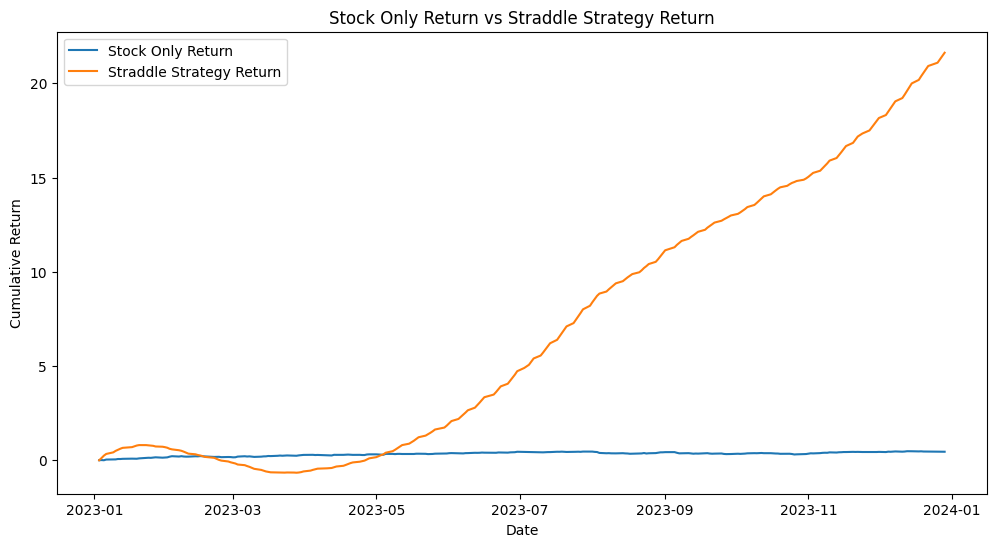

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Straddle 설정
strike_price = 150
premium_paid_call = 5   # 콜 옵션 매수 시 지불한 프리미엄 (예시)
premium_paid_put = 4    # 풋 옵션 매수 시 지불한 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Straddle 수익 계산 함수
def calculate_straddle(stock_data, strike_price, premium_paid_call, premium_paid_put):
    # 콜 옵션 손익 계산
    stock_data['Call Option Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
                                                     stock_data['Stock Price'] - strike_price,
                                                     0) - premium_paid_call
    # 풋 옵션 손익 계산
    stock_data['Put Option Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price,
                                                    strike_price - stock_data['Stock Price'],
                                                    0) - premium_paid_put

    # Straddle 전략의 총 수익 계산
    stock_data['Straddle Profit'] = stock_data['Call Option Profit/Loss'] + stock_data['Put Option Profit/Loss']

    # 총 수익률 계산
    stock_data['Straddle Return'] = stock_data['Straddle Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Straddle Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
straddle_results = calculate_straddle(data, strike_price, premium_paid_call, premium_paid_put)

# 결과 출력
print(straddle_results[['Stock Price', 'Stock Return', 'Straddle Profit', 'Straddle Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(straddle_results.index, straddle_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(straddle_results.index, straddle_results['Straddle Return'].cumsum(), label='Straddle Strategy Return')
plt.title('Stock Only Return vs Straddle Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
